In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
!gdown --id '1e0T6Lc0PUwsCO4VAfmd4ADDk0FaCq8_m' --output level-6.csv

Downloading...
From: https://drive.google.com/uc?id=1e0T6Lc0PUwsCO4VAfmd4ADDk0FaCq8_m
To: /content/level-6.csv
100% 248k/248k [00:00<00:00, 31.5MB/s]


In [3]:
train = pd.read_csv("level-6.csv")
train.head()

,index,Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;Candidatus_Nitrocosmicus,Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;Candidatus_Nitrososphaera,Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;__,Archaea;Thermoplasmatota;Thermoplasmata;Thermoplasmatales;Thermoplasmataceae;uncultured,Archaea;__;__;__;__;__,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteria;Acidobacteriia;Acidobacteriales;Acidobacteriaceae;PAC001990,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;PAC000004;EU192989,Bacteria;Acidobacteria;CP011806;CP011806;CP011806;CP011806,Bacteria;Acidobacteria;CP011806;CP011806;PAC002217;PAC002217,Bacteria;Acidobacteria;PAC001813;PAC001813;PAC001813;PAC001813,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;PAC001852,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;PAC002038,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;__,Bacteria;Acidobacteria;Solibacteres;Solibacterales;Bryobacteraceae;PAC002019,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;PAC002281;PAC002281,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001869,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001874,Bacteria;Acidobacteriota;Acidobacteriae;Acidobacteriales;Acidobacteriaceae_(Subgroup_1);uncultured,Bacteria;Acidobacteriota;Acidobacteriae;Bryobacterales;Bryobacteraceae;Bryobacter,Bacteria;Acidobacteriota;Blastocatellia;11-24;__;__,Bacteria;Acidobacteriota;Blastocatellia;11-24;uncultured_Pelobacter_sp.;,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae;Aridibacter,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae;__,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae;uncultured,Bacteria;Acidobacteriota;Blastocatellia;Elev-16S-573;uncultured_microorganism;,Bacteria;Acidobacteriota;Blastocatellia;Pyrinomonadales;Pyrinomonadaceae;RB41,Bacteria;Acidobacteriota;Holophagae;Subgroup_7;Acidobacteria_bacterium;,Bacteria;Acidobacteriota;Holophagae;Subgroup_7;__;__,Bacteria;Acidobacteriota;Subgroup_11;__;__;__,Bacteria;Acidobacteriota;Subgroup_11;uncultured_sponge_symbiont_PAUC37f;;__,Bacteria;Acidobacteriota;Subgroup_18;alkali_sediment_metagenome;;__,Bacteria;Acidobacteriota;Subgroup_22;__;__;__,Bacteria;Acidobacteriota;Subgroup_25;uncultured_Firmicutes_bacterium;;__,Bacteria;Acidobacteriota;Subgroup_5;uncultured_Acidobacteriales_bacterium;;__,Bacteria;Acidobacteriota;Thermoanaerobaculia;Thermoanaerobaculales;Thermoanaerobaculaceae;Subgroup_10,Bacteria;Acidobacteriota;Vicinamibacteria;Subgroup_17;__;__,Bacteria;Acidobacteriota;Vicinamibacteria;Subgroup_17;agricultural_soil_bacterium_SC-I-8;,Bacteria;Acidobacteriota;Vicinamibacteria;Subgroup_17;uncultured_Holophaga_sp.;,...,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Hydrocarboniphaga,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Nevskia,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;Steroidobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Arenimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Luteimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonada

In [4]:
# shortrun = train[train['Merged'] < 920].index
# train = train.drop(shortrun,axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Columns: 590 entries, index to Cancer
dtypes: float64(587), int64(1), object(2)
memory usage: 567.1+ KB


In [5]:
CAT_COL = ["index", "Cancer"]

NUM_COL=[]
for i in range(len(train.columns)):
  NUM_COL.append(train.columns[i])
NUM_COL.remove('index')
NUM_COL.remove('Cancer')

cat_col = []
num_col = []
for col in train:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)
for col in cat_col:
  train[col] = train[col].astype(str)

df_cat = train.loc[:,cat_col] # take all the categorical columns
df_cat = pd.get_dummies(df_cat) # one hot encoding

df_num = train.loc[:,num_col] # take all the numerical columns
df_final = pd.concat([df_cat, df_num], axis=1) # concat categorical/numerical data

In [6]:
df_final.head()

,index_SRR8902009,index_SRR8902010,index_SRR8902011,index_SRR8902012,index_SRR8902013,index_SRR8902014,index_SRR8902015,index_SRR8902016,index_SRR8902017,index_SRR8902018,index_SRR8902019,index_SRR8902020,index_SRR8902021,index_SRR8902022,index_SRR8902023,index_SRR8902024,index_SRR8902025,index_SRR8902026,index_SRR8902027,index_SRR8902028,index_SRR8902029,index_SRR8902030,index_SRR8902031,index_SRR8902032,index_SRR8902033,index_SRR8902034,index_SRR8902035,index_SRR8902036,index_SRR8902037,index_SRR8902038,index_SRR8902039,index_SRR8902040,index_SRR8902041,index_SRR8902042,index_SRR8902043,index_SRR8902044,index_SRR8902045,index_SRR8902046,index_SRR8902047,index_SRR8902048,...,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Enhydrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Hydrocarboniphaga,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Nevskia,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;Steroidobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Arenimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Luteimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Lysobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Pseudoxanthomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Stenotrophomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Thermomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Vulcaniibacterium,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;__;__;__,Bacteria;Proteobacteria;__;__;__;__,Bacteria;SAR324_clade(Marine_group_B);uncultured_Phaselicystis_sp.;;__;__,Bacteria;Spirochaetota;Spirochaetia;Spirochaetales;Spirochaetaceae;Sediminispirochaeta,Bacteria;Spirochaetota;Spirochaetia;Spirochaetales;Spirochaetaceae;Treponema,Bacteria;Sva0485;uncultured_Geobacter_sp.;;__;__,Bacteria;Synergistota;Synergistia;Synergistales;Synergistaceae;Fretibacterium,Bacteria;Synergistota;Synergistia;Synergistales;Synergistaceae;Pyramidobacter,Bacteria;Tenericutes;Mollicutes;Bacilloplasma;Lumbricoplasmataceae;GQ866067,Bacteria;Verrucomicrobiota;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Verrucomicrobiota;Omnitrophia;Omnitrophales;Omnitrophaceae;Candidatus_Omnitrophus,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Chthoniobacterales;Chthoniobacteraceae;Candidatus_Udaeobacter,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Chthoniobacterales;Chthoniobacteraceae;LD29,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Opitutales;Opitutaceae;IMCC26134,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;ADurb.Bin063-1,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Prosthecobacter,Bacteria;Zixibacteria;uncultured_gamma_proteobacterium;;__;__,Bacteria;__;__;__;__;__,Unassigned;__;__;__;__;__,Merged
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000093,0.0,0.0,0.009615,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001393,0.

In [7]:
not_select = ["index", "Cancer", "Merged"]
train_select = train.drop(not_select,axis=1)
train_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Columns: 587 entries, Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;Candidatus_Nitrocosmicus to Unassigned;__;__;__;__;__
dtypes: float64(587)
memory usage: 564.2 KB


In [8]:
cat_col = []
num_col = []
for col in train_select:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)

for col in cat_col:
  if train_select[col].dtype != "O":
    # print(col)
    train_select[col] = train_select[col].astype(str)

df_cat_select = train_select.loc[:,cat_col] # take all the categorical columns
#df_cat_select = pd.get_dummies(df_cat_select) # one hot encoding

df_num_select = train_select.loc[:,num_col] # take all the numerical columns
df_final_select = pd.concat([df_cat_select, df_num_select], axis=1) # concat categorical/numerical data

In [9]:
df_final_select.head()

,Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;Candidatus_Nitrocosmicus,Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;Candidatus_Nitrososphaera,Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;__,Archaea;Thermoplasmatota;Thermoplasmata;Thermoplasmatales;Thermoplasmataceae;uncultured,Archaea;__;__;__;__;__,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteria;Acidobacteriia;Acidobacteriales;Acidobacteriaceae;PAC001990,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;PAC000004;EU192989,Bacteria;Acidobacteria;CP011806;CP011806;CP011806;CP011806,Bacteria;Acidobacteria;CP011806;CP011806;PAC002217;PAC002217,Bacteria;Acidobacteria;PAC001813;PAC001813;PAC001813;PAC001813,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;PAC001852,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;PAC002038,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;__,Bacteria;Acidobacteria;Solibacteres;Solibacterales;Bryobacteraceae;PAC002019,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;PAC002281;PAC002281,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001869,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001874,Bacteria;Acidobacteriota;Acidobacteriae;Acidobacteriales;Acidobacteriaceae_(Subgroup_1);uncultured,Bacteria;Acidobacteriota;Acidobacteriae;Bryobacterales;Bryobacteraceae;Bryobacter,Bacteria;Acidobacteriota;Blastocatellia;11-24;__;__,Bacteria;Acidobacteriota;Blastocatellia;11-24;uncultured_Pelobacter_sp.;,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae;Aridibacter,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae;__,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae;uncultured,Bacteria;Acidobacteriota;Blastocatellia;Elev-16S-573;uncultured_microorganism;,Bacteria;Acidobacteriota;Blastocatellia;Pyrinomonadales;Pyrinomonadaceae;RB41,Bacteria;Acidobacteriota;Holophagae;Subgroup_7;Acidobacteria_bacterium;,Bacteria;Acidobacteriota;Holophagae;Subgroup_7;__;__,Bacteria;Acidobacteriota;Subgroup_11;__;__;__,Bacteria;Acidobacteriota;Subgroup_11;uncultured_sponge_symbiont_PAUC37f;;__,Bacteria;Acidobacteriota;Subgroup_18;alkali_sediment_metagenome;;__,Bacteria;Acidobacteriota;Subgroup_22;__;__;__,Bacteria;Acidobacteriota;Subgroup_25;uncultured_Firmicutes_bacterium;;__,Bacteria;Acidobacteriota;Subgroup_5;uncultured_Acidobacteriales_bacterium;;__,Bacteria;Acidobacteriota;Thermoanaerobaculia;Thermoanaerobaculales;Thermoanaerobaculaceae;Subgroup_10,Bacteria;Acidobacteriota;Vicinamibacteria;Subgroup_17;__;__,Bacteria;Acidobacteriota;Vicinamibacteria;Subgroup_17;agricultural_soil_bacterium_SC-I-8;,Bacteria;Acidobacteriota;Vicinamibacteria;Subgroup_17;uncultured_Holophaga_sp.;,Bacteria;Acidobacteriota;Vicinamibacteria;Vicinamibacterales;Vicinamibacteraceae;Luteitalea,...,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Enhydrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Hydrocarboniphaga,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Nevskia,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;Steroidobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;

#Random Forest Classifier

In [11]:
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use RandomForestClassifier to predict Cancer
  x = df_final_select
  y = train["Cancer"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  #RandomForest
  rfc = RandomForestClassifier(n_estimators=1000)
  #rfc=RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
  rfc.fit(X_train,y_train)
  y_predict = rfc.predict(X_test)
  score_rfc = rfc.score(X_test,y_test)
  score_rfc_train = rfc.score(X_train,y_train)
  print("train_accuracy = ",score_rfc_train*100," %")
  print("val_accuracy = ",score_rfc*100," %")
  train_accuracy.append(score_rfc_train)
  val_accuracy.append(score_rfc)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
  # from sklearn.metrics import confusion_matrix
  # mat = confusion_matrix(y_test, y_predict)
  # sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
  # plt.xlabel('true label')
  # plt.ylabel('predicted label')
print('avg_val_accuracy = ',round(avg_val_accuracy,4))
print('avg_train_accuracy = ',round(avg_train_accuracy,4))

train_accuracy =  100.0  %
val_accuracy =  92.0  %
train_accuracy =  100.0  %
val_accuracy =  92.0  %
train_accuracy =  100.0  %
val_accuracy =  92.0  %
train_accuracy =  100.0  %
val_accuracy =  92.0  %
train_accuracy =  100.0  %
val_accuracy =  92.0  %
train_accuracy =  100.0  %
val_accuracy =  92.0  %
train_accuracy =  100.0  %
val_accuracy =  92.0  %
train_accuracy =  100.0  %
val_accuracy =  92.0  %
train_accuracy =  100.0  %
val_accuracy =  92.0  %
train_accuracy =  100.0  %
val_accuracy =  92.0  %
avg_val_accuracy =  0.92
avg_train_accuracy =  1.0


Text(91.68, 0.5, 'predicted label')

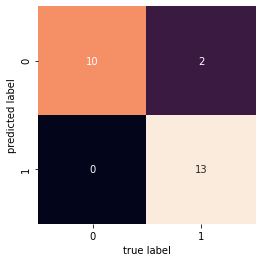

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#SVM

In [15]:
from sklearn import svm
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use SVM to predict Cancer
  x = df_final_select
  y = train["Cancer"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  clf = svm.SVC()
  clf.fit(X_train,y_train)
  y_predict = clf.predict(X_test)
  score_clf = clf.score(X_test,y_test)
  score_clf_train = clf.score(X_train,y_train)
  print("train_accuracy = ",score_clf_train*100," %")
  print("val_accuracy = ",score_clf*100," %")
  train_accuracy.append(score_clf_train)
  val_accuracy.append(score_clf)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
print('avg_train_accuracy = ',round(avg_train_accuracy,4))
print('avg_val_accuracy = ',round(avg_val_accuracy,4))

train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
train_accuracy =  66.3265306122449  %
val_accuracy =  56.00000000000001  %
avg_train_accuracy =  0.6633
avg_val_accuracy =  0.56


Text(91.68, 0.5, 'predicted label')

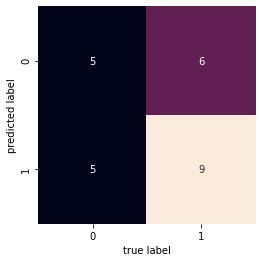

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Neural network MLPClassifier

In [17]:
from sklearn.neural_network import MLPClassifier
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use Neural Network MLPClassifier to predict Cancer
  x = df_final_select
  y = train["Cancer"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  nnclf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 30), random_state=1, max_iter=2000)
  nnclf.fit(X_train,y_train)
  y_predict = nnclf.predict(X_test)
  score_nnclf = nnclf.score(X_test,y_test)
  score_nnclf_train = nnclf.score(X_train,y_train)
  print("train_accuracy = ",score_nnclf_train*100," %")
  print("val_accuracy = ",score_nnclf*100," %")
  train_accuracy.append(score_nnclf_train)
  val_accuracy.append(score_nnclf)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
print('avg_train_accuracy = ',round(avg_train_accuracy,4))
print('avg_val_accuracy = ',round(avg_val_accuracy,4))

train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
train_accuracy =  98.9795918367347  %
val_accuracy =  88.0  %
avg_train_accuracy =  0.9898
avg_val_accuracy =  0.88


Text(91.68, 0.5, 'predicted label')

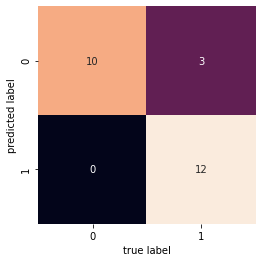

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use Logistic Regression to predict Cancer
  x = df_final_select
  y = train["Cancer"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  logclf = LogisticRegression(random_state=0).fit(X_train,y_train)
  y_predict = logclf.predict(X_test)
  score_logclf = logclf.score(X_test,y_test)
  score_logclf_train = logclf.score(X_train,y_train)
  print("train_accuracy = ",score_logclf_train*100," %")
  print("val_accuracy = ",score_logclf*100," %")
  train_accuracy.append(score_logclf_train)
  val_accuracy.append(score_logclf)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
print('avg_train_accuracy = ',round(avg_train_accuracy,4))
print('avg_val_accuracy = ',round(avg_val_accuracy,4))

train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
train_accuracy =  63.26530612244898  %
val_accuracy =  52.0  %
avg_train_accuracy =  0.6327
avg_val_accuracy =  0.52


Text(91.68, 0.5, 'predicted label')

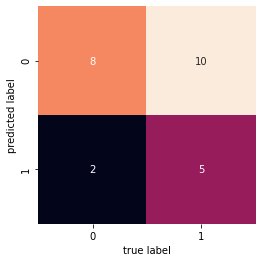

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#DNN

In [21]:
import os
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [22]:
target_var = 'Cancer'
features = list(df_final_select.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
label2 = np.zeros((123,1))

for i in range(len(transformed_labels)):
  if transformed_labels[i][0] == 0:
    label2[i][0] = np.int(1)
  elif transformed_labels[i][0] == 1:
    label2[i][0] = np.int(0)

transformed_labels = np.concatenate((transformed_labels, label2),axis=1)

y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(df_final_select[features], train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [71]:
np.random.seed(5)
# model
init = K.initializers.glorot_uniform(seed=1)
model = K.models.Sequential()
model.add(K.layers.Dense(units=30, input_dim=587, kernel_initializer=init, activation='relu'))
# model.add(K.layers.Dense(units=5, input_dim=30, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=2, kernel_initializer=init, activation='relu'))

In [50]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 30)                17640     
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 62        
Total params: 17,702
Trainable params: 17,702
Non-trainable params: 0
_________________________________________________________________


In [72]:
# 訓練模型
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h = model.fit(train_x, train_y, epochs=10, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/10
25/25 [==============================] - 1s 16ms/step - loss: 1.3403 - accuracy: 0.4796 - val_loss: 1.3003 - val_accuracy: 0.4800
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 1.1769 - accuracy: 0.5204 - val_loss: 0.7016 - val_accuracy: 0.4800
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9682 - accuracy: 0.4796 - val_loss: 0.6827 - val_accuracy: 0.4800
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.9459 - accuracy: 0.5306 - val_loss: 1.2706 - val_accuracy: 0.6400
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5612 - val_loss: nan - val_accuracy: 0.4400
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5408 - val_loss: nan - val_accuracy: 0.4400
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6633 - val_loss: nan - val_accuracy: 0.6800
Epoch 8/10
25/25 [===================

|train_accuracy|val_accuracy|
|-----|--------|
|0.6531| 0.6000|  
|0.6327| 0.6400|
|0.5510| 0.4400|
|0.6531| 0.6400|
|0.6837| 0.7200|
|0.6939| 0.7600|
|0.6735| 0.6800|
|0.7857| 0.8000|
|0.5816| 0.7200|
|0.6837| 0.6400|

In [73]:
train_accuracy = [0.6531,0.6327,0.5510,0.6531,0.6837,0.6939,0.6735,0.7857,0.5816,0.6837]
val_accuracy = [0.6000,0.6400,0.4400,0.6400,0.7200,0.7600,0.6800,0.8000,0.7200,0.6400]
print('avg_train_accuracy = ',round(sum(train_accuracy)/10,4))
print('avg_val_accuracy = ',round(sum(val_accuracy)/10,4))

avg_train_accuracy =  0.6592
avg_val_accuracy =  0.664


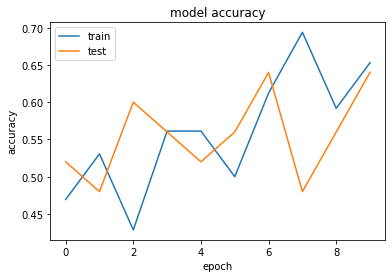

In [58]:
#0.6531/0.6400
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

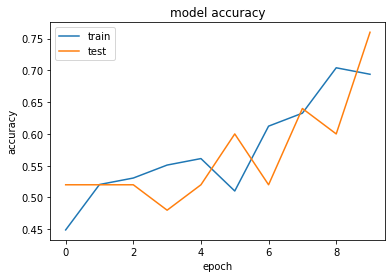

In [64]:
#0.6939/0.7600
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#PH-CNN
##reference:
###https://github.com/dfioravanti/phylogenetic-cnn
###https://www.tensorflow.org/tutorials/images/cnn

In [74]:
import os
from tensorflow.keras import datasets, layers, models

##Import coordinate data

In [75]:
#reshape
!gdown --id '1HgYWrJfHoQ4wnQFbvN7FTk4_hmsIBsQ4' --output ordinate.csv
C = pd.read_csv("ordinate.csv")
# Xs = df_final_select.values

Downloading...
From: https://drive.google.com/uc?id=1HgYWrJfHoQ4wnQFbvN7FTk4_hmsIBsQ4
To: /content/ordinate.csv
100% 83.6k/83.6k [00:00<00:00, 51.0MB/s]


In [76]:
# C = C.drop(shortrun,axis=0)
C.head()

,index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Merged,Cancer
0,SRR8902009,-1.911565,-0.130933,0.241523,-0.186078,0.077002,-0.089216,0.099553,-0.005171,0.070688,-0.079547,0.039522,0.004842,0.053914,-0.017129,0.009014,-0.025193,0.027081,-0.022814,-0.011557,0.005086,0.005741,-0.000445,-0.018710,-0.030781,-0.013815,0.012013,-0.010422,0.006829,-0.014077,-0.002617,0.010747,0.007030,-0.003023,0.006745,0.003035,0.001295,0.003207,-0.001052,-0.000695,1.670000e-07,0.001888,-0.000115,-0.000152,-0.000195,-0.000474,0.000589,0.000192,0.000608,0.000352,-0.000154,0.000109,-0.000076,0.000022,43058,non-cancer
1,SRR8902010,-0.670388,-0.139795,-0.143867,0.034392,-0.083314,0.019363,-0.095083,-0.012729,-0.011440,-0.048129,-0.014132,-0.029556,0.022631,0.014344,0.012266,0.007994,0.012941,0.032526,-0.011803,0.003206,0.000344,-0.017838,0.005328,0.025024,-0.025832,0.002351,0.006479,-0.004508,-0.013529,0.011298,0.019441,0.009865,-0.008397,-0.006525,0.005525,-0.001332,-0.001145,-0.000582,0.001307,8.495410e-04,0.001288,-0.000104,0.000844,0.002350,0.001816,0.000212,-0.000466,0.000353,0.000300,-0.000340,0.000392,0.000079,-0.000013,53224,non-cancer
2,SRR8902011,-0.464162,0.164427,0.015042,0.102230,-0.117228,-0.076915,0.120495,-0.084897,-0.032670,-0.008778,-0.044142,0.036700,-0.000531,-0.044393,-0.020713,0.014254,-0.005428,-0.036960,-0.009586,0.048998,-0.006120,-0.003565,0.032228,-0.047669,-0.006488,-0.000774,0.011437,-0.023980,-0.022038,0.013284,-0.006805,0.002464,0.008513,0.005854,-0.003138,0.001961,-0.006615,-0.000565,0.001220,4.356303e-03,0.000495,0.001300,-0.000936,-0.000295,-0.001083,0.000206,-0.001323,0.000214,-0.000069,0.000222,-0.000252,-0.000182,0.000072,38463,non-cancer
3,SRR8902012,-0.145446,0.239443,-0.114709,0.339471,0.053531,0.130749,0.167982,0.104918,-0.011611,0.042453,0.053314,-0.060781,-0.003986,-0.000609,0.027233,-0.010224,0.015341,-0.003070,-0.008556,-0.003393,0.002096,0.000035,0.006360,-0.003833,0.013008,0.008176,0.000320,0.000910,-0.001126,-0.004030,-0.005569,0.001904,-0.003949,-0.002314,0.000568,-0.000578,0.001194,0.000007,-0.001075,3.478540e-04,0.000528,-0.000159,0.000291,-0.001547,0.000334,-0.000057,0.000072,0.000032,-0.000092,-0.000048,-0.000007,0.000060,-0.000061,32140,non-cancer
4,SRR8902013,0.284827,-0.045105,-0.005029,0.013437,0.042888,-0.001357,-0.025879,0.007970,-0.026813,-0.028465,-0.001895,0.024499,-0.010677,-0.007326,0.022309,0.009375,0.004422,0.003244,0.002572,0.003097,-0.004964,0.014000,0.008550,0.003091,-0.003124,0.001013,0.007608,-0.000193,0.004409,0.001048,-0.004593,0.005518,0.007060,0.003847,0.002859,-0.005296,0.003714,-0.007572,0.003925,1.597404e-03,0.008585,-0.001469,0.001439,0.001883,-0.005489,-0.003538,0.000106,-0.000395,-0.000833,-0.001615,0.003547,-0.003226,-0.001859,56985,non-cancer


In [77]:
not_select=['index', 'Merged','Cancer']
C_final = C.drop(not_select,axis=1)
C_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       123 non-null    float64
 1   2       123 non-null    float64
 2   3       123 non-null    float64
 3   4       123 non-null    float64
 4   5       123 non-null    float64
 5   6       123 non-null    float64
 6   7       123 non-null    float64
 7   8       123 non-null    float64
 8   9       123 non-null    float64
 9   10      123 non-null    float64
 10  11      123 non-null    float64
 11  12      123 non-null    float64
 12  13      123 non-null    float64
 13  14      123 non-null    float64
 14  15      123 non-null    float64
 15  16      123 non-null    float64
 16  17      123 non-null    float64
 17  18      123 non-null    float64
 18  19      123 non-null    float64
 19  20      123 non-null    float64
 20  21      123 non-null    float64
 21  22      123 non-null    float64
 22  23

In [78]:
C_final.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,-1.911565,-0.130933,0.241523,-0.186078,0.077002,-0.089216,0.099553,-0.005171,0.070688,-0.079547,0.039522,0.004842,0.053914,-0.017129,0.009014,-0.025193,0.027081,-0.022814,-0.011557,0.005086,0.005741,-0.000445,-0.018710,-0.030781,-0.013815,0.012013,-0.010422,0.006829,-0.014077,-0.002617,0.010747,0.007030,-0.003023,0.006745,0.003035,0.001295,0.003207,-0.001052,-0.000695,1.670000e-07,0.001888,-0.000115,-0.000152,-0.000195,-0.000474,0.000589,0.000192,0.000608,0.000352,-0.000154,0.000109,-0.000076,0.000022
1,-0.670388,-0.139795,-0.143867,0.034392,-0.083314,0.019363,-0.095083,-0.012729,-0.011440,-0.048129,-0.014132,-0.029556,0.022631,0.014344,0.012266,0.007994,0.012941,0.032526,-0.011803,0.003206,0.000344,-0.017838,0.005328,0.025024,-0.025832,0.002351,0.006479,-0.004508,-0.013529,0.011298,0.019441,0.009865,-0.008397,-0.006525,0.005525,-0.001332,-0.001145,-0.000582,0.001307,8.495410e-04,0.001288,-0.000104,0.000844,0.002350,0.001816,0.000212,-0.000466,0.000353,0.000300,-0.000340,0.000392,0.000079,-0.000013
2,-0.464162,0.164427,0.015042,0.102230,-0.117228,-0.076915,0.120495,-0.084897,-0.032670,-0.008778,-0.044142,0.036700,-0.000531,-0.044393,-0.020713,0.014254,-0.005428,-0.036960,-0.009586,0.048998,-0.006120,-0.003565,0.032228,-0.047669,-0.006488,-0.000774,0.011437,-0.023980,-0.022038,0.013284,-0.006805,0.002464,0.008513,0.005854,-0.003138,0.001961,-0.006615,-0.000565,0.001220,4.356303e-03,0.000495,0.001300,-0.000936,-0.000295,-0.001083,0.000206,-0.001323,0.000214,-0.000069,0.000222,-0.000252,-0.000182,0.000072
3,-0.145446,0.239443,-0.114709,0.339471,0.053531,0.130749,0.167982,0.104918,-0.011611,0.042453,0.053314,-0.060781,-0.003986,-0.000609,0.027233,-0.010224,0.015341,-0.003070,-0.008556,-0.003393,0.002096,0.000035,0.006360,-0.003833,0.013008,0.008176,0.000320,0.000910,-0.001126,-0.004030,-0.005569,0.001904,-0.003949,-0.002314,0.000568,-0.000578,0.001194,0.000007,-0.001075,3.478540e-04,0.000528,-0.000159,0.000291,-0.001547,0.000334,-0.000057,0.000072,0.000032,-0.000092,-0.000048,-0.000007,0.000060,-0.000061
4,0.284827,-0.045105,-0.005029,0.013437,0.042888,-0.001357,-0.025879,0.007970,-0.026813,-0.028465,-0.001895,0.024499,-0.010677,-0.007326,0.022309,0.009375,0.004422,0.003244,0.002572,0.003097,-0.004964,0.014000,0.008550,0.003091,-0.003124,0.001013,0.007608,-0.000193,0.004409,0.001048,-0.004593,0.005518,0.007060,0.003847,0.002859,-0.005296,0.003714,-0.007572,0.003925,1.597404e-03,0.008585,-0.001469,0.001439,0.001883,-0.005489,-0.003538,0.000106,-0.000395,-0.000833,-0.001615,0.003547,-0.003226,-0.001859


In [79]:
X_final = pd.concat([df_final_select, C_final], axis=1)
X_final.shape

(123, 640)

In [80]:
target_var = 'Cancer'
features = list(X_final.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
label2 = np.zeros((123,1))

for i in range(len(transformed_labels)):
  if transformed_labels[i][0] == 0:
    label2[i][0] = np.int(1)
  elif transformed_labels[i][0] == 1:
    label2[i][0] = np.int(0)

transformed_labels = np.concatenate((transformed_labels, label2),axis=1)

y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(X_final[features], train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [81]:
print(train_x.shape)
print(test_x.shape)

(98, 640)
(25, 640)


In [82]:
train_x = train_x.values.reshape(98, 4, 4, 40)
train_x = train_x.reshape(98, 4, 4, 40)
test_x = test_x.values.reshape(25, 4, 4, 40)
test_x = test_x.reshape(25, 4, 4, 40)

## Model

In [108]:
model = K.models.Sequential()
model.add(K.layers.Conv2D(40, (3, 3), activation='relu', input_shape=train_x.shape[1:]))
model.add(K.layers.Conv2D(20, (1, 1), activation='relu', input_shape=train_x.shape[1:]))
model.add(K.layers.MaxPooling2D((2, 2)))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(64, activation= 'relu'))
model.add(K.layers.Dropout(0.25))
model.add(K.layers.Dense(2,activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 2, 40)          14440     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 20)          820       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                1344      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 2)               

In [109]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=30, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/30
25/25 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5204 - val_loss: 0.7025 - val_accuracy: 0.4000
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.7019 - val_accuracy: 0.4000
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5306 - val_loss: 0.7010 - val_accuracy: 0.4400
Epoch 4/30
25/25 [==============================] - 0s 6ms/step - loss: 0.6821 - accuracy: 0.5306 - val_loss: 0.7049 - val_accuracy: 0.4000
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6796 - accuracy: 0.5204 - val_loss: 0.7048 - val_accuracy: 0.4000
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6744 - accuracy: 0.5408 - val_loss: 0.7085 - val_accuracy: 0.4000
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6668 - accuracy: 0.6122 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 8/30
25/25 [=

|train_accuracy|val_accuracy|
|-----|--------|
|0.9490| 0.8800|  
|0.9592| 0.8400|
|0.9490| 0.8000|
|0.9694| 0.8000|
|0.9490| 0.8000|
|0.9490| 0.8800|
|0.9490| 0.8000|
|0.9796| 0.8400|
|0.9694| 0.8400|
|0.9592| 0.8400|

In [110]:
train_accuracy = [0.9490,0.9592,0.9490,0.9694,0.9490,0.9490,0.9490,0.9796,0.9694,0.9592]
val_accuracy = [0.8800,0.8400,0.8000,0.8000,0.8000,0.8800,0.8000,0.8400,0.8400,0.8400]
print('avg_train_accuracy = ',round(sum(train_accuracy)/10,4))
print('avg_val_accuracy = ',round(sum(val_accuracy)/10,4))

avg_train_accuracy =  0.9582
avg_val_accuracy =  0.832


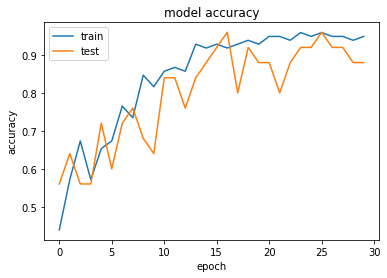

In [88]:
#0.9490/0.8800
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

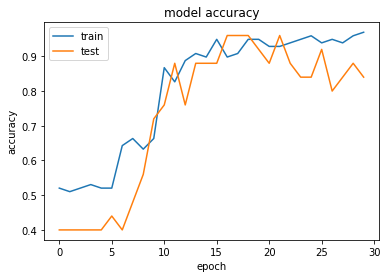

In [107]:
#0.9694/0.8400
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#GCN

In [10]:
import os
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [11]:
!gdown --id '1IQF5ywTp5Yy9WRUSkKcl1YeYulqBz_up' --output A.csv
!gdown --id '1w2qIqBvvk-M2RdQ78ojfL891FMY5AwUx' --output D.csv
A = pd.read_csv("A.csv",header=None)
D = pd.read_csv("D.csv",header=None)

Downloading...
From: https://drive.google.com/uc?id=1IQF5ywTp5Yy9WRUSkKcl1YeYulqBz_up
To: /content/A.csv
100% 179k/179k [00:00<00:00, 40.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1w2qIqBvvk-M2RdQ78ojfL891FMY5AwUx
To: /content/D.csv
100% 30.5k/30.5k [00:00<00:00, 51.3MB/s]


In [12]:
train = pd.read_csv("level-6.csv")
train.head()

,index,Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;Candidatus_Nitrocosmicus,Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;Candidatus_Nitrososphaera,Archaea;Crenarchaeota;Nitrososphaeria;Nitrososphaerales;Nitrososphaeraceae;__,Archaea;Thermoplasmatota;Thermoplasmata;Thermoplasmatales;Thermoplasmataceae;uncultured,Archaea;__;__;__;__;__,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteria;Acidobacteriia;Acidobacteriales;Acidobacteriaceae;PAC001990,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;PAC000004;EU192989,Bacteria;Acidobacteria;CP011806;CP011806;CP011806;CP011806,Bacteria;Acidobacteria;CP011806;CP011806;PAC002217;PAC002217,Bacteria;Acidobacteria;PAC001813;PAC001813;PAC001813;PAC001813,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;PAC001852,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;PAC002038,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;__,Bacteria;Acidobacteria;Solibacteres;Solibacterales;Bryobacteraceae;PAC002019,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;PAC002281;PAC002281,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001869,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001874,Bacteria;Acidobacteriota;Acidobacteriae;Acidobacteriales;Acidobacteriaceae_(Subgroup_1);uncultured,Bacteria;Acidobacteriota;Acidobacteriae;Bryobacterales;Bryobacteraceae;Bryobacter,Bacteria;Acidobacteriota;Blastocatellia;11-24;__;__,Bacteria;Acidobacteriota;Blastocatellia;11-24;uncultured_Pelobacter_sp.;,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae;Aridibacter,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae;__,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae;uncultured,Bacteria;Acidobacteriota;Blastocatellia;Elev-16S-573;uncultured_microorganism;,Bacteria;Acidobacteriota;Blastocatellia;Pyrinomonadales;Pyrinomonadaceae;RB41,Bacteria;Acidobacteriota;Holophagae;Subgroup_7;Acidobacteria_bacterium;,Bacteria;Acidobacteriota;Holophagae;Subgroup_7;__;__,Bacteria;Acidobacteriota;Subgroup_11;__;__;__,Bacteria;Acidobacteriota;Subgroup_11;uncultured_sponge_symbiont_PAUC37f;;__,Bacteria;Acidobacteriota;Subgroup_18;alkali_sediment_metagenome;;__,Bacteria;Acidobacteriota;Subgroup_22;__;__;__,Bacteria;Acidobacteriota;Subgroup_25;uncultured_Firmicutes_bacterium;;__,Bacteria;Acidobacteriota;Subgroup_5;uncultured_Acidobacteriales_bacterium;;__,Bacteria;Acidobacteriota;Thermoanaerobaculia;Thermoanaerobaculales;Thermoanaerobaculaceae;Subgroup_10,Bacteria;Acidobacteriota;Vicinamibacteria;Subgroup_17;__;__,Bacteria;Acidobacteriota;Vicinamibacteria;Subgroup_17;agricultural_soil_bacterium_SC-I-8;,Bacteria;Acidobacteriota;Vicinamibacteria;Subgroup_17;uncultured_Holophaga_sp.;,...,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Hydrocarboniphaga,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Nevskia,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;Steroidobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Steroidobacterales;Steroidobacteraceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Arenimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Luteimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonada

In [13]:
A = A.to_numpy()
D = D.to_numpy()
# df_final_select = df_final_select.to_numpy()

In [14]:
print(A)

[[0.         1.29661612 1.53217669 ... 2.14679259 2.20973032 2.34553852]
 [1.29661612 0.         0.42549539 ... 0.9867725  0.94468442 1.07789739]
 [1.53217669 0.42549539 0.         ... 0.73958126 0.80310137 0.93864593]
 ...
 [2.14679259 0.9867725  0.73958126 ... 0.         0.24217945 0.3818302 ]
 [2.20973032 0.94468442 0.80310137 ... 0.24217945 0.         0.14395285]
 [2.34553852 1.07789739 0.93864593 ... 0.3818302  0.14395285 0.        ]]


In [15]:
print(D)

[[137   0   0 ...   0   0   0]
 [  0  40   0 ...   0   0   0]
 [  0   0  81 ...   0   0   0]
 ...
 [  0   0   0 ... 140   0   0]
 [  0   0   0 ...   0  96   0]
 [  0   0   0 ...   0   0  64]]


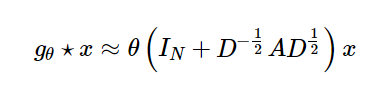

In [16]:
x = df_final_select.to_numpy()
I = np.eye(123)
g_theta = np.matmul((I + ((D**0.5)*A*(D**0.5))),x)
print(g_theta)

[[0.00000000e+00 0.00000000e+00 2.32245000e-04 ... 0.00000000e+00
  6.79571740e-01 1.27734700e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.34285285e-01 3.38193000e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.64461950e-01 4.15984000e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.93410000e-02 4.00160000e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.81894580e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.78204820e-02 0.00000000e+00]]


In [17]:
target_var = 'Cancer'
features = list(df_final_select.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
label2 = np.zeros((123,1))

for i in range(len(transformed_labels)):
  if transformed_labels[i][0] == 0:
    label2[i][0] = np.int(1)
  elif transformed_labels[i][0] == 1:
    label2[i][0] = np.int(0)

transformed_labels = np.concatenate((transformed_labels, label2),axis=1)
y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(g_theta, train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [18]:
train_x.shape

(98, 587)

In [20]:
# train_x = train_x.values.reshape(98, 1, 1, 587)
train_x = train_x.reshape(98, 1, 1, 587)
# test_x = test_x.values.reshape(25, 1, 1, 587)
test_x = test_x.reshape(25, 1, 1, 587)

## Model

In [45]:
model = K.models.Sequential()
model.add(K.layers.Conv2D(587, (1, 1), activation='relu', input_shape=train_x.shape[1:]))
# model.add(K.layers.Conv2D(30, (1, 1), input_shape=train_x.shape[1:]))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(32, activation= 'relu'))
model.add(K.layers.Dropout(0.15))
model.add(K.layers.Dense(2,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 1, 1, 587)         345156    
_________________________________________________________________
flatten_3 (Flatten)          (None, 587)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                18816     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 364,038
Trainable params: 364,038
Non-trainable params: 0
_________________________________________________________________


In [46]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=50, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.6935 - accuracy: 0.4694 - val_loss: 0.6961 - val_accuracy: 0.4800
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5408 - val_loss: 0.6959 - val_accuracy: 0.4800
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5102 - val_loss: 0.6953 - val_accuracy: 0.4800
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5816 - val_loss: 0.6954 - val_accuracy: 0.4800
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5510 - val_loss: 0.6951 - val_accuracy: 0.5200
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5408 - val_loss: 0.6948 - val_accuracy: 0.5200
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5918 - val_loss: 0.6942 - val_accuracy: 0.5200
Epoch 8/50
25/25 [=

|train_accuracy|val_accuracy|
|-----|--------|
|0.6837| 0.7200|  
|0.6633| 0.7200|
|0.6327| 0.6400|
|0.6939| 0.6800|
|0.7551| 0.6400|
|0.6735| 0.6400|
|0.7143| 0.5600|
|0.6531| 0.6000|
|0.7245| 0.7200|
|0.7551| 0.7200|

In [48]:
train_accuracy = [0.6837,0.6633,0.6327,0.6939,0.7551,0.6735,0.7143,0.6531,0.7245,0.7551]
val_accuracy = [0.7200,0.7200,0.6400,0.6800,0.6400,0.6400,0.5600,0.6000,0.7200,0.7200]
print('avg_train_accuracy = ',round(sum(train_accuracy)/10,4))
print('avg_val_accuracy = ',round(sum(val_accuracy)/10,4))

avg_train_accuracy =  0.6949
avg_val_accuracy =  0.664


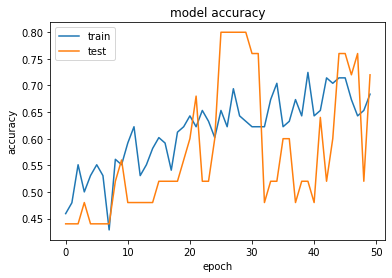

In [24]:
#0.6837/0.7200
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

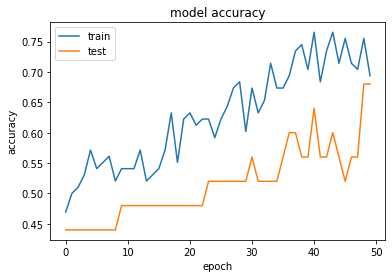

In [34]:
#0.6939/0.6800
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()